In [332]:
import medpy
#import cv2 as cv
from skimage import data
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import skimage
from skimage import morphology as mr
from skimage import data
from skimage.morphology import disk
from skimage.util import crop

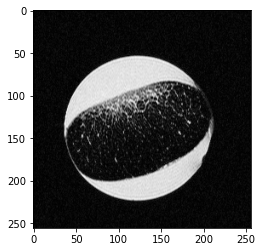

In [343]:
image_directory= 'D:/OneDrive/PHD/MRI-image_to_Abaqus/WW_tendons_WW_tendons_pilot_study_E4_P1_Z-001/'
from skimage import io
image_data2 = io.imread(image_directory + 'MRIm060')
image_data3 = io.imread(image_directory + 'MRIm092')
#image_data2 = image_data2.T
plt.imshow(image_data2, cmap = cm.Greys_r)

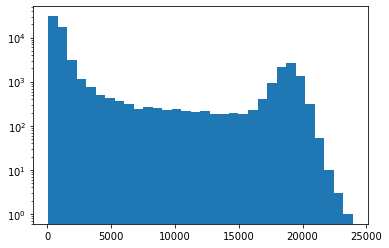

In [344]:
plt.hist(image_data2.ravel(), bins=32, log=True)
bgmean = image_data2[:10,:10].mean() #głowna wartość na histogramie - od niej uzależniam treshhold
bgmean

bgmean3 = image_data3[:10,:10].mean() #głowna wartość na histogramie - od niej uzależniam treshhold


In [345]:
def newMRImaskImage(im,bgmean,Nbg):
    return im>Nbg*bgmean


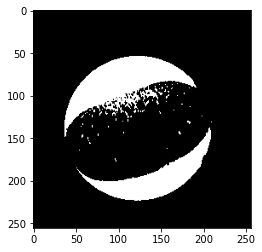

In [346]:
maskBackGround = newMRImaskImage(image_data2,bgmean,18)
mask3BackGround = newMRImaskImage(image_data3,bgmean,18)
#maskBackGround=mr.opening(maskBackGround, disk(1))
#maskBackGround=mr.closing(maskBackGround, disk(2))

plt.imshow(maskBackGround, cmap = cm.Greys_r);

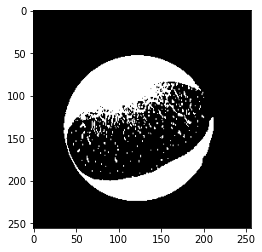

In [347]:
maskTendon = newMRImaskImage(image_data2,bgmean,7)
plt.imshow(maskTendon, cmap = cm.Greys_r);

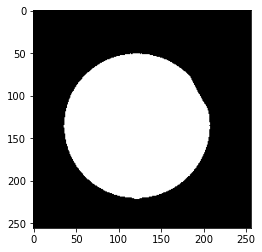

In [353]:
maskBackGround_2=mr.closing(mask3BackGround, disk(36))

#maskBackGround_2=mr.closing(maskBackGround, disk(38))
#maskBackGround_2=mr.opening(maskBackGround_2, disk(60))
#maskBackGround_2 = mr.convex_hull_image(maskBackGround_2)
plt.imshow(maskBackGround_2, cmap = cm.Greys_r)

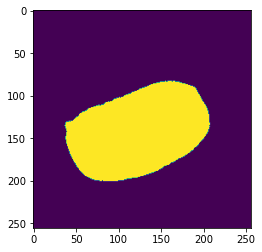

In [354]:
maskBackGround_3=maskBackGround_2*(-1)+maskBackGround
maskBackGround_3=mr.opening(maskBackGround_3, disk(5))*(-1)
maskBackGround_3=mr.opening(maskBackGround_3, disk(5))
plt.imshow(maskBackGround_3)

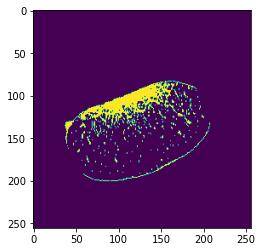

In [355]:
maskResult_matrix=maskTendon*maskBackGround_3
#maskResult_matrix=maskResult_matrix*maskBackGround_3
plt.imshow(maskResult_matrix)

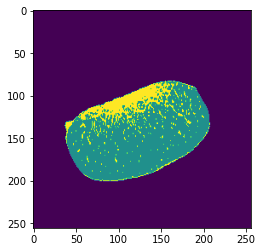

In [356]:
maskResult_tendon=maskResult_matrix+maskBackGround_3
#maskResult_tendon=mr.opening(maskResult_tendon, disk(3))

plt.imshow(maskResult_tendon)

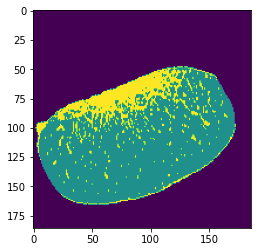

In [357]:
margin1=35 # jaki margines
margin2=(maskResult_tendon.shape[0])-margin1
maskResult_tendonCrop =maskResult_tendon[margin1:margin2, margin1:margin2]

plt.imshow(maskResult_tendonCrop)

In [ ]:
import glob
#import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import skimage
from skimage import morphology as mr
from skimage import data
from skimage.morphology import disk
from skimage import io
import os
#zdefiniuj ściezkę, w której są zdjęcia MRI. Nie może tam być innych plików/folderów.
dir='WW_tendons_WW_tendons_pilot_study_E4_P1_Z-001/'
#marginesy do obcięcia zdjęcia. Im bardzije przycięte tym szybciej działa. Uważać na wcicięcie obiektu
margins=35 

In [ ]:
image_directory= 'D:/OneDrive/PHD/MRI-image_to_Abaqus/WW_tendons_WW_tendons_pilot_study_E4_P1_Z-001/'
image_data2 = io.imread(image_directory + 'MRIm092')



def newMRImaskImage(im,bgmean,Nbg):
    return im>Nbg*bgmean

def get_3values_mask(MRIimage,margins,maskBackGround_2):
    bgmean = MRIimage[:10,:10].mean() #głowna wartość na histogramie - od niej uzależniam treshhold
    maskBackGround = newMRImaskImage(MRIimage,bgmean,18) 
    maskTendon = newMRImaskImage(MRIimage,bgmean,7)
    #maskBackGround_2=mr.closing(maskBackGround, disk(38))
    maskBackGround_3=maskBackGround_2*(-1)+maskBackGround
    maskBackGround_3=mr.opening(maskBackGround_3, disk(5))*(-1)
    maskBackGround_3=mr.opening(maskBackGround_3, disk(5))

    maskResult_matrix=maskTendon*maskBackGround_3
    maskResult_tendon=maskResult_matrix+maskBackGround_3
    margin1=margins # jaki margines
    margin2=(maskResult_tendon.shape[0])-margin1
    maskResult_tendonCrop =maskResult_tendon[margin1:margin2, margin1:margin2]

    return (maskResult_tendonCrop)

def get_all_MRI(dir):
    #""" Return a list of the video filename from a directory and its subdirectories """
    
    list_MRI_fn = []
    for dirpath, dirnames, filenames in os.walk(dir):
        for filename in [f for f in filenames]:
            im = io.imread(dir + filename)
            #im = im.T
            #print(im)
            list_MRI_fn.append(im)

    return list_MRI_fn

bgmean = image_data2[:10,:10].mean()
maskBackGround = newMRImaskImage(image_data2,bgmean,18)
maskBackGround_2=mr.closing(maskBackGround, disk(36))

In [ ]:

MRIlist = get_all_MRI(dir)
im=MRIlist[0]
i,j = im.shape
k=len(MRIlist)
matrix=np.zeros((i-(margins*2),j-(margins*2)))
list_array=[]
z=0
for x, MRIimage in enumerate(MRIlist):
    z+=1
    try:
        if z > 24 and z<108:
            matrix=np.dstack((matrix, get_3values_mask(MRIimage,margins,maskBackGround_2)))
        else:
            pass
        print('stack layer: {}'.format(z))

    except:
        print('miss layer: {}'.format(z))
matrix=np.dstack((matrix, np.zeros((i-(margins*2),j-(margins*2)))))
print('Done')

In [ ]:
mMRI=matrix.T
mMRis0=mMRI.shape[0]
mMRis1=mMRI.shape[1]
mMRis2=mMRI.shape[2]
mMRI=mMRI
print(mMRI.shape)


In [ ]:
mMRItoSave=mMRI.reshape((mMRI.shape[0], mMRI.shape[1]*mMRI.shape[2]))
print(mMRItoSave.shape)

In [ ]:
np.savetxt('matrixOfMRI_MRILayers_'+str(mMRis0)+'x'+str(mMRis1)+'x'+str(mMRis2)+'.txt', mMRItoSave, delimiter=";")


In [ ]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from skimage import measure


verts, faces=measure.marching_cubes_classic(matrix, level=None, spacing=(1.0, 1.0, 2.0), gradient_direction='descent')
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111, projection='3d')


mesh = Line3DCollection(verts[faces],linewidths=0.06)
#mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(0, 206)  
ax.set_ylim(0, 206)  
ax.set_zlim(0, 260)  

#plt.tight_layout()
plt.show()